## Esercizio Classificazione NLP1

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/NLPes1.csv'


In [2]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
df=pd.read_csv(path)

In [3]:
import re 

In [ ]:
df

In [10]:
print(df.dtypes) 
print(df.head())

text    object
dtype: object
                                           text
0  insane ( but inspired ) musical about alferd
1   written by david j . schow and john shirley
2    miramax  disinvited  on-line media from pr


In [12]:
regex_pattern = r'^b''\s*$'

In [13]:
def apply_regex(text):
    matches = re.findall(regex_pattern, text)
    return matches

In [14]:
df['matches'] = df['text'].apply(apply_regex)

In [15]:
print(df.head())

                                           text matches
0  insane ( but inspired ) musical about alferd      []
1   written by david j . schow and john shirley      []
2    miramax  disinvited  on-line media from pr      []


In [17]:
## STEP 2 : EDA con WORDCLOUD
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import string



In [25]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rober\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df = pd.read_csv("NLPes1.csv")

In [27]:
def clean_text(text):
    text = str(text)  # Assicura che il testo sia una stringa
    text = re.sub(r"^b'|'\s*$", "", text)  # Rimuove prefisso b' e apostrofi finali
    text = text.lower().translate(str.maketrans("", "", string.punctuation))  # Minuscolo e rimuove punteggiatura
    return " ".join([word for word in text.split() if word not in stop_words])

In [28]:
df["clean_text"] = df["text"].apply(clean_text)

In [29]:
if "clean_text" in df.columns:
    all_text = " ".join(df["clean_text"])  # Concatena tutti i testi puliti in un'unica stringa
else:
    raise ValueError("La colonna 'clean_text' non è stata creata correttamente!")


In [30]:
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_text)

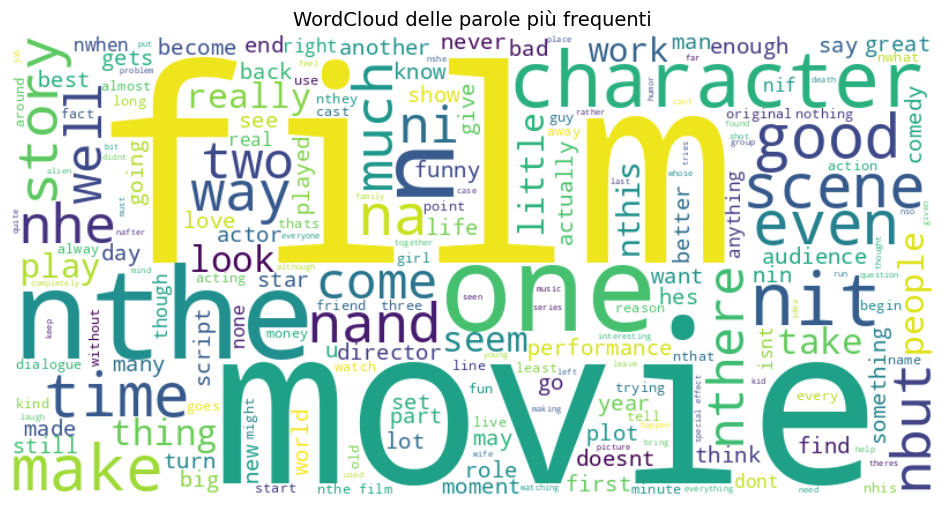

In [31]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud delle parole più frequenti", fontsize=14)
plt.show()

In [35]:
##STEP 3: Definizre X e y (features testuali e Target)
X = df["clean_text"]  # Se hai già pulito il testo, usa questa colonna
y = df["class"]


In [36]:
X = df["clean_text"]

In [37]:
X

0      insane inspired musical alferd packer first ma...
1      written david j schow john shirley based comic...
2      miramax disinvited online media press screenin...
3      astronauts wife charlize theron plays young wo...
4      one 90s unwelcome thriller trends returns grav...
                             ...                        
408    hav plenty told beginning reminded film true s...
409    brian de palmas snake eyes stars nicolas cages...
410    contact pg theres moment late robert zemeckiss...
411    bthis film inclined like outset two main chara...
412    remake alfred hitchcock film best uncertain pr...
Name: clean_text, Length: 413, dtype: object

In [38]:
##STEP 4: Vettorizzazione - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [39]:
X_bow = vectorizer.fit_transform(X)

In [40]:
print("Forma della matrice BoW:", X_bow.shape)
print("Esempio di feature names:", vectorizer.get_feature_names_out()[:10])

Forma della matrice BoW: (413, 23045)
Esempio di feature names: ['00' '000' '05' '10' '100' '1000' '10000' '100m' '100minute' '101']


In [41]:
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

In [42]:
print(df_bow.head())

   00  000  05  10  100  1000  10000  100m  100minute  101  ...  zoolander  \
0   0    0   0   0    0     0      0     0          0    0  ...          0   
1   0    0   0   0    1     0      0     0          0    0  ...          0   
2   0    0   0   0    1     0      0     0          0    0  ...          0   
3   0    0   0   0    0     0      0     0          0    0  ...          0   
4   0    0   0   0    0     0      0     0          0    0  ...          0   

   zoologist  zooming  zooms  zoot  zucker  zulu  zurgs  zwick  zwicks  
0          0        0      0     0       1     0      0      0       0  
1          0        0      0     0       0     0      0      0       0  
2          0        0      0     0       0     0      0      0       0  
3          0        0      0     0       0     0      0      0       0  
4          0        0      0     0       0     0      0      0       0  

[5 rows x 23045 columns]


In [43]:
##STEP 5: TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


In [44]:
X_tfidf = tfidf_vectorizer.fit_transform(X)

In [48]:
print("Forma della matrice TF-IDF:", X_tfidf.shape)
print("Esempio di feature names:", tfidf_vectorizer.get_feature_names_out()[:10]) 


Forma della matrice TF-IDF: (413, 23045)
Esempio di feature names: ['00' '000' '05' '10' '100' '1000' '10000' '100m' '100minute' '101']


In [49]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf.head())

    00  000   05   10       100  1000  10000  100m  100minute  101  ...  \
0  0.0  0.0  0.0  0.0  0.000000   0.0    0.0   0.0        0.0  0.0  ...   
1  0.0  0.0  0.0  0.0  0.040629   0.0    0.0   0.0        0.0  0.0  ...   
2  0.0  0.0  0.0  0.0  0.030197   0.0    0.0   0.0        0.0  0.0  ...   
3  0.0  0.0  0.0  0.0  0.000000   0.0    0.0   0.0        0.0  0.0  ...   
4  0.0  0.0  0.0  0.0  0.000000   0.0    0.0   0.0        0.0  0.0  ...   

   zoolander  zoologist  zooming  zooms  zoot    zucker  zulu  zurgs  zwick  \
0        0.0        0.0      0.0    0.0   0.0  0.051138   0.0    0.0    0.0   
1        0.0        0.0      0.0    0.0   0.0  0.000000   0.0    0.0    0.0   
2        0.0        0.0      0.0    0.0   0.0  0.000000   0.0    0.0    0.0   
3        0.0        0.0      0.0    0.0   0.0  0.000000   0.0    0.0    0.0   
4        0.0        0.0      0.0    0.0   0.0  0.000000   0.0    0.0    0.0   

   zwicks  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[

In [50]:
##STEP 6: Split Training and Test
from sklearn.model_selection import train_test_split


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [52]:
print("Forma di X_train:", X_train.shape)
print("Forma di X_test:", X_test.shape)
print("Forma di y_train:", y_train.shape)
print("Forma di y_test:", y_test.shape)

Forma di X_train: (330, 23045)
Forma di X_test: (83, 23045)
Forma di y_train: (330,)
Forma di y_test: (83,)


In [53]:
##STEP 7: Modellazione
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [55]:
pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))  # Puoi sostituire LogisticRegression con qualsiasi altro modello
])

In [56]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', LogisticRegression(max_iter=1000))])

In [57]:
y_pred = pipeline.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza del modello:", accuracy)

# Stampare le forme per verifica
print("Forma di X_train:", X_train.shape)
print("Forma di X_test:", X_test.shape)
print("Forma di y_train:", y_train.shape)
print("Forma di y_test:", y_test.shape)

Accuratezza del modello: 0.7349397590361446
Forma di X_train: (330, 23045)
Forma di X_test: (83, 23045)
Forma di y_train: (330,)
Forma di y_test: (83,)


In [ ]:
# Step 8: Pipeline Finale (nuovo train test split su dati raw tetuali)
